# Matrix Factorization
- $A = P Q$

In [5]:
using Random
using Zygote
using Plots
using SparseArrays

In [33]:
#function cost(P, Q, A)
#    M, N = size(A)
#    # D = size(P)[2]
#    sum((A - P*Q).^2)/(M*N)
#end

function cost_sp(P, Q, MNA)
    M_vec, N_vec, A_vec = MNA
    L = length(A_vec)
    J = 0.0
    for l in 1:L
        m, n, a = M_vec[l], N_vec[l], A_vec[l]
        J += (a - P[m,:]' * Q[:,n])^2
    end
    J / L    
end

dcost_sp_P(P,Q,MNA) = gradient(x -> cost_sp(x,Q,MNA), P)
dcost_sp_Q(P,Q,MNA) = gradient(x -> cost_sp(P,x,MNA), Q)

function update_sp(P, Q, MNA, N_epoch=100, μ=0.1)
    J_a = zeros(Float32, N_epoch)
    J = cost_sp(P, Q, MNA)
    for i in 1:N_epoch
        dP = dcost_sp_P(P,Q,MNA)[1]
        P -= μ * dP
        dQ = dcost_sp_Q(P,Q,MNA)[1]
        Q -= μ * dQ
        J = cost_sp(P,Q,MNA)
        J_a[i] = J
    end
    P, Q, J_a
end

function train_sp(A_sp, D_featrues, N_epoch=100, μ=0.1)
    M_vec, N_vec, A_vec = findnz(A_sp)
    MNA = (M_vec, N_vec, A_vec)
    
    M, N = size(A_sp)
    τ = 0.01
    P = rand(Float32, M, D_featrues) * τ
    Q = rand(Float32, D_featrues, N) * τ    
    
    update_sp(P, Q, MNA, N_epoch, μ)
end

function main(;train=train_sp)
    M, N, L = 4, 4, 10
    A = sparse(rand(1:M,L), rand(1:N,L), rand(Float32,L), M, N)

    N_epoch = 1000

    D_feature = 1
    P, Q, J_a = train(A, D_feature, N_epoch)
    plot(1:N_epoch, J_a)
    println("Last cost: J=$(J_a[end])")

    D_feature = 2
    P, Q, J_a = train(A, D_feature, N_epoch)
    plot!(1:N_epoch, J_a)    
    println("Last cost: J=$(J_a[end])")
    
    D_feature = 3
    P, Q, J_a = train(A, D_feature, N_epoch)
    f = plot!(1:N_epoch, J_a)    
    println("Last cost: J=$(J_a[end])")    

    display(f)
    
    function run(D_feature;plot=plot!)
        P, Q, J_a = train(A, D_feature, N_epoch)
        println("Last cost: J=$(J_a[end])")    
        plot(1:N_epoch, J_a)
    end
        
    run(1;plot=plot)
    run(2)    
    run(3)
    f = run(4)
    display(f)    
end

main (generic function with 1 method)

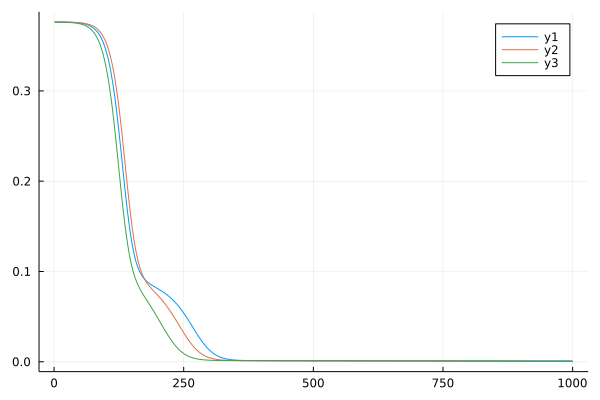

Last cost: J=0.0010231845
Last cost: J=0.00040143303
Last cost: J=0.00056353456


In [35]:
main()